## Load the data

Let's load the data and import the libraries we will be using.


In [30]:
# Libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t
from pandas.core.generic import Axis
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Longbones/Longbones.csv'

# Loading in our data
df = pd.read_csv(data_url)

# Print out your DataFrame
df.shape

(42, 7)

In [3]:
df.head()

,Site,Time,Depth,Lime,Age,Nitro,Oil
0,1,88.5,7.0,1,NaN,3.88,1
1,1,88.5,NaN,1,NaN,4.00,1
2,1,85.2,7.0,1,NaN,3.69,1
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0


## Dropping the missing data

Now, let's determine if there is any missing data in the dataset. If there is, we will drop the row that contains a missing value.


In [4]:
# Gives us the total of null values
num_null = df.isnull().sum().sum()

num_null

8

In [5]:
# Drops the rows containing a null value
df = df.dropna()

In [6]:
# Displays the row and column count of our dataframe
df.shape

# Before (42, 7), After (35, 7)

(35, 7)

## Hypothesis testing

We will use scipy from the library stats to perform a 1 sample T-Test. This shows the statistical difference between a mean and hypothesized value of the mean in the population.



In [7]:
# a= the sample observation
# popmean will be the expected value in the null hypothesis
t, p = stats.ttest_1samp(a= df['Nitro'], popmean= 4.3)

# "t" will be assigned to the t statistice while "p" to the p-value
t, p

(-16.52576582183037, 8.097649978903497e-18)

## Confidence Interval

Calculating a 95% confidence interval for the mean nitrogen composition in the longbones of a deceased individual using the t.interval function.

* The lower end of the confidence interval will be assigned to the variable `l`
* The upper end of the confidence interval will be assigned to the variable `u`


In [10]:
# Library function used
# from scipy.stats import t

# Degrees of freedom
deg_free = df.shape[0]-1

# "t" continuous random variable.
# "ppf" percent point function
# Combined"t.ppf"
t_star = t.ppf(q= .975, df= deg_free)

# Margin of error calculate and assigend to variable margin_error
margin_error = t_star * df['Nitro'].sem()
l = df['Nitro'].mean() - margin_error
u = df['Nitro'].mean() + margin_error

print(f"The lower confidence interval is {l}")
print(f"The upper confidence interval is {u}")

The lower confidence interval is 3.7340209520249212
The upper confidence interval is 3.8579790479750775


## Frequency and relative frequency

Calculating the frequency and relative frequency of viewing the control version of the website and the experimental version of the website.



In [11]:
# Load control data
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Udacity%20AB%20testing%20data/AB%20testing%20data.csv'
ABtest_ = pd.read_csv(data_url)

print(ABtest_.shape)
ABtest_.head()

(999, 10)


,Date,C-Pageviews,C-Clicks,C-Enrollments,C-Payments,E-Pageviews,E-Clicks,E-Enrollments,E-Payments,Unnamed: 9
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,7716.0,686.0,105.0,34.0,NaN
1,"Sun, Oct 12",9102.0,779.0,147.0,70.0,9288.0,785.0,116.0,91.0,NaN
2,"Mon, Oct 13",10511.0,909.0,167.0,95.0,10480.0,884.0,145.0,79.0,NaN
3,"Tue, Oct 14",9871.0,836.0,156.0,105.0,9867.0,827.0,138.0,92.0,NaN
4,"Wed, Oct 15",10014.0,837.0,163.0,64.0,9793.0,832.0,140.0,94.0,NaN


In [12]:
# load experimental data
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Udacity%20AB%20testing%20data/AB_test_payments.csv'

ABtest = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(ABtest.shape)
ABtest.head()

(7208, 3)


,UserID,Group,Payment
0,0,Control,1
1,1,Control,1
2,2,Control,1
3,3,Control,1
4,4,Control,1


### Dataset information

Is there an association between a screen a porential student viewed as they were signing up and wether or not they converted to a paying customer?

In [16]:
# The counts of control and experiment
group_freq = ABtest['Group'].value_counts()

# The percentage of those value counts
group_pct = group_freq / 7208*100

print(group_freq)

print(group_pct)

Control       3785
Experiment    3423
Name: Group, dtype: int64
Control       52.511099
Experiment    47.488901
Name: Group, dtype: float64


## More frequency and relative frequency

Calculating the frequency and relative frequency of converting to a paying customer.


In [18]:
# Counts of converted paying customer w/ 1 indicting a new suctomer
pay_freq = ABtest['Payment'].value_counts()

# Percentage of converted paying customer
pay_pct = pay_freq / 7208 *100

print(pay_freq)
print(pay_pct)

1    3978
0    3230
Name: Payment, dtype: int64
1    55.188679
0    44.811321
Name: Payment, dtype: float64


## Joint distribution

Calculating the joint distribution of experimental condition and conversion to a paying customer.


In [20]:
# pd.crosstab

# Computes a frequency table of the factors unless an array
# of values and an aggregation function are passed.
joint_dist = pd.crosstab(ABtest['Group'], ABtest['Payment'])
joint_dist

Payment,0,1
Group,,
Control,1752,2033
Experiment,1478,1945


## Marginal distribution

Adding the table margins to the joint distribution of experimental condition and conversion to a paying customer.


In [21]:

marginal_dist = pd.crosstab(ABtest['Group'], ABtest['Payment'], margins= True)
marginal_dist

Payment,0,1,All
Group,,,
Control,1752,2033,3785
Experiment,1478,1945,3423
All,3230,3978,7208


## Conditional distribution

Calculating the distribution of payment conversion conditional on the text the individual saw when he or she was signing up for Udacity.


In [22]:
conditional_dist = pd.crosstab(index=ABtest['Group'], columns= ABtest['Payment'], normalize = 'index')*100

conditional_dist

Payment,0,1
Group,,
Control,46.287979,53.712021
Experiment,43.178498,56.821502


## Hypothesis testing

The statistics wether a screen veiwing student became a paying customer.




In [28]:
# Chi-square test of independence of variables in a contingency table.
g, p, dof, expctd= chi2_contingency(joint_dist)
print(f"statistic {g}")
print(f"p-value {p}")
print(f"degrees of freedom {dof}")
print(f"expected frequency {expctd}")


statistic 6.902249432727325
p-value 0.008608736615463934
degrees of freedom 1
expected frequency [[1696.10849057 2088.89150943]
 [1533.89150943 1889.10849057]]


## Visualization

A side by side barplot illustrating the distribution of conversion by experimental group.

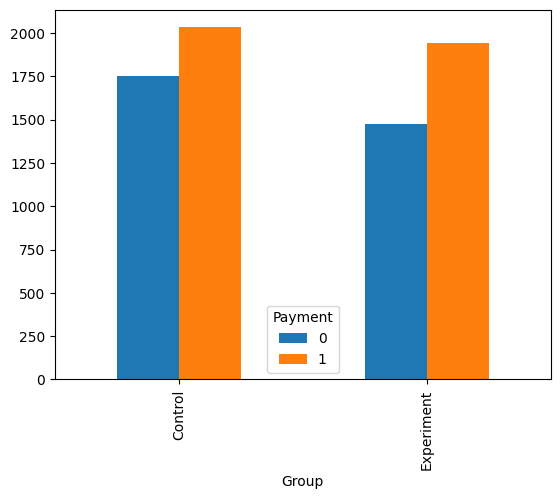

In [31]:

joint_dist.plot(kind='bar');